# 2.1. Problem Statement: Machine Learning 7

In [9]:
'''
In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("nba_2013.csv")

In [3]:
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
data.shape

(481, 31)

In [5]:
data.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [6]:
data.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [7]:
data.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

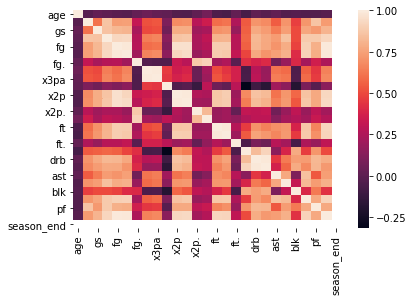

In [11]:
sns.heatmap(data.corr())
plt.show()

In [14]:
# convert objects to numeric
data = data.convert_objects(convert_numeric=True).dropna()

C:\Users\Dikshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [25]:
data.isnull().any().sum()

0

In [28]:
data.duplicated().any().sum()

0

In [31]:
data.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [32]:
data1 = data.drop(['player','pos','bref_team_id','season'],axis=1)

In [36]:
data1.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,72,144,216,28,23,26,30,122,171,2013
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,32,230,262,248,35,3,146,136,1330,2013
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,94,183,277,40,23,46,63,187,328,2013
6,28,69,69,2498,652,1423,0.458,3,15,0.200000,...,166,599,765,178,63,68,123,147,1603,2013
7,24,65,2,1072,134,300,0.447,2,13,0.153846,...,119,192,311,71,24,33,44,126,303,2013


In [34]:
from sklearn.neighbors import KNeighborsRegressor
X =  data1.drop('pts',axis=1)
y = data1['pts']

In [37]:
# divide the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 5)

In [40]:
# creating the knn model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [41]:
predictions = knn.predict(X_test)

In [44]:
print("predictions[:5]:\n", predictions)

predictions[:5]:
 [  78.6  350.8   37.6  699.6  175.4  691.   800.4  426.2  194.  1382.8
   64.4   29.2  810.4 1177.4 1353.8  443.2   90.4  222.8  200.6  935.
 1417.4 1100.   104.8  286.4  331.6   64.6  650.8  616.6  346.   694.
   21.4 1137.2 1021.   759.2 1157.2 1420.8  341.   286.8  442.2  592.
  338.2  122.    82.6  593.8 1116.6  836.4  360.4 1050.2   72.8   87.4
 1215.6  716.  1179.6 1816.2  490.2  644.8  800.6  682.6  784.   253.4
  618.2  153.    64.8  494.2  184.2  203.6  114.6  945.4  170.6  183.2
 1036.2 1058.   453.2  787.4  394.   114.6  739.   127.8  553.8  617.4
  523.8]


In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error = sqrt(mean_squared_error(y_test,predictions))
print(error)

75.5206422602947


In [48]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 95.0098760298627
RMSE value for k=  2 is: 74.868238168263
RMSE value for k=  3 is: 77.05514388347223
RMSE value for k=  4 is: 75.46576057072849
RMSE value for k=  5 is: 75.5206422602947
RMSE value for k=  6 is: 74.83111529428487
RMSE value for k=  7 is: 74.37265635367301
RMSE value for k=  8 is: 75.0910352854914
RMSE value for k=  9 is: 76.01056709440944
RMSE value for k=  10 is: 75.58868636358775
RMSE value for k=  11 is: 74.6306362300061
RMSE value for k=  12 is: 76.13458962463372
RMSE value for k=  13 is: 76.40673188299549
RMSE value for k=  14 is: 77.66917344677532
RMSE value for k=  15 is: 78.60864010425176
RMSE value for k=  16 is: 81.85562983572034
RMSE value for k=  17 is: 83.68736433778776
RMSE value for k=  18 is: 84.1992050718744
RMSE value for k=  19 is: 84.01309417680251
RMSE value for k=  20 is: 83.70709662084425


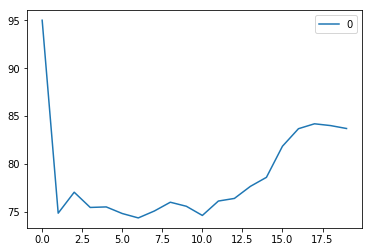

In [49]:
# plotting the rmse values against the k value
curve = pd.DataFrame(rmse_val)
curve.plot()

In [50]:
# Implementing GridsearchCV
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model = GridSearchCV(knn,params,cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 5}

# 2.2. Problem Statement: Machine Learning 8

In [ ]:
'''
In this assignment students have to find the frequency of words in a
webpage. User can use urllib and BeautifulSoup to extract text from
webpage.
'''

In [1]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
from nltk.corpus import stopwords 
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
clean_tokens = tokens[:] 
sr = stopwords.words('english') 
for token in tokens: 
    if token in stopwords.words('english'): 
        clean_tokens.remove(token) 
freq = nltk.FreqDist(clean_tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviou

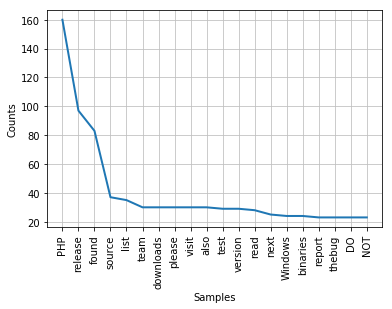

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
freq.plot(20,cumulative=False)

# 2.3. Problem Statement: Machine Learning 9

In [ ]:
'''
In this assignment students have to compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference.
The raw image is available in spicy.misc package with the name face.
'''

In [16]:
%matplotlib inline

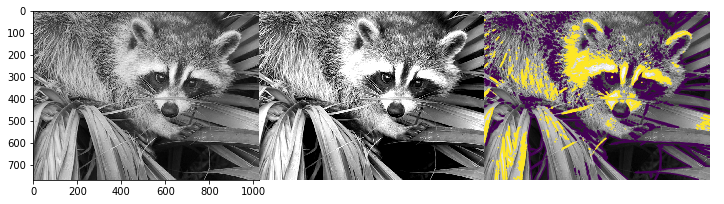

In [17]:
import scipy.misc
import matplotlib.pyplot as plt

f = scipy.misc.face(gray=True)

plt.figure(figsize=(10, 3.6))

plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray)

plt.subplot(132)
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)
plt.axis('off')

plt.subplot(133)
plt.imshow(f, cmap=plt.cm.gray)
plt.contour(f, [50, 200])
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,
                    right=0.99)
plt.show()

# 2.4. Problem Statement: Machine Learning 10

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
%matplotlib inline

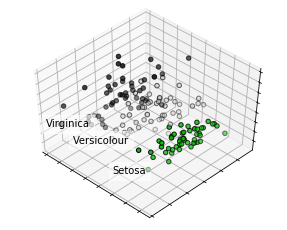

In [15]:
np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# 2.5. Problem Statement: Machine Learning 11

In [ ]:
'''
In this assignment students have to make ARIMA model over shampoo sales
data and check the MSE between predicted and actual value.
'''

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
#from pandas.plotting import partialautocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [5]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 

In [6]:
ts = pd.read_csv("Shampoo_Sales.csv", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


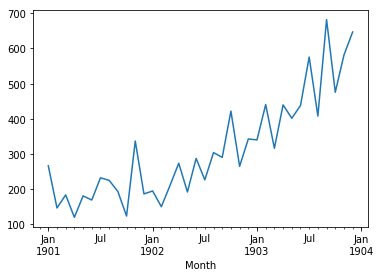

In [7]:
print(ts.head())
ts.plot()
plt.show()

In [8]:
#Check Stationarity
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

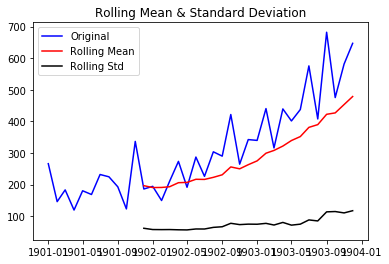

Results of Dickey-Fuller Test:
Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


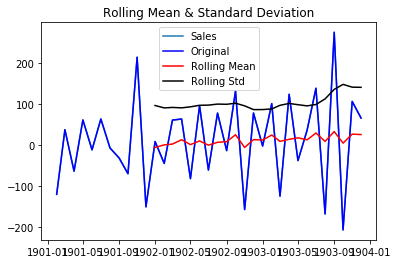

Results of Dickey-Fuller Test:
Test Statistic                -7.249074e+00
p-value                        1.799857e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.300000e+01
Critical Value (1%)           -3.646135e+00
Critical Value (5%)           -2.954127e+00
Critical Value (10%)          -2.615968e+00
dtype: float64


In [9]:
test_stationarity(ts)
ts_diff = ts.diff(periods=1)
plt.plot(ts_diff)
ts_diff.dropna(inplace=True)
test_stationarity(ts_diff)


In [10]:
#Decompose ts
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

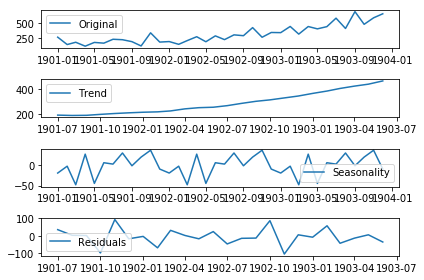

In [11]:
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\Dikshit\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


predicted=307.508755, expected=342.300000
predicted=301.813955, expected=339.700000
predicted=316.960437, expected=440.400000
predicted=321.902549, expected=315.900000


C:\Users\Dikshit\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Dikshit\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=359.566226, expected=439.300000
predicted=371.274809, expected=401.300000
predicted=410.774998, expected=437.400000
predicted=417.838754, expected=575.500000
predicted=441.257844, expected=407.600000
predicted=512.882422, expected=682.000000
predicted=462.954398, expected=475.300000
predicted=617.188451, expected=581.300000
predicted=551.350196, expected=646.900000
Test MSE: 7003.681


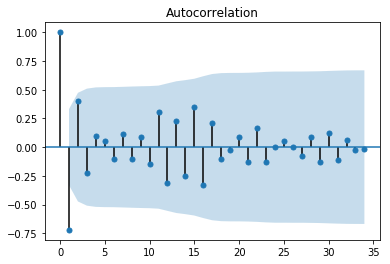

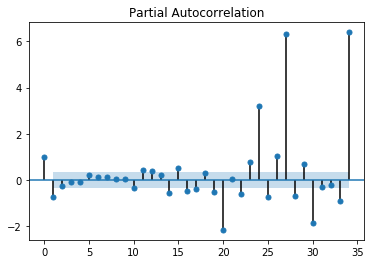

In [12]:
plot_acf(ts_diff)
plot_pacf(ts_diff)
X = ts.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

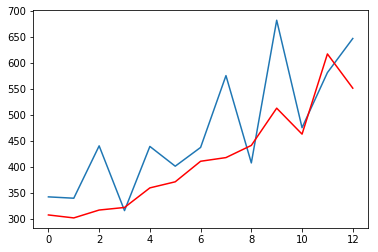

In [13]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [14]:
# Fit a simple auto_arima model
#building the model
from pmdarima.arima import auto_arima

In [15]:
auto_arima(history,error_action='ignore')

C:\Users\Dikshit\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(2, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)

C:\Users\Dikshit\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


predicted=384.283278, expected=342.300000
predicted=316.888983, expected=339.700000
predicted=337.349246, expected=440.400000
predicted=378.283254, expected=315.900000
predicted=413.320926, expected=439.300000
predicted=370.978097, expected=401.300000
predicted=425.757087, expected=437.400000
predicted=429.401396, expected=575.500000
predicted=474.580648, expected=407.600000
predicted=542.710119, expected=682.000000
predicted=480.813555, expected=475.300000
predicted=634.327270, expected=581.300000
predicted=561.051560, expected=646.900000
Test MSE: 5689.929


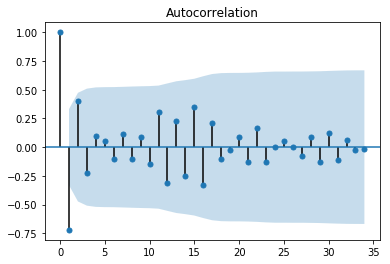

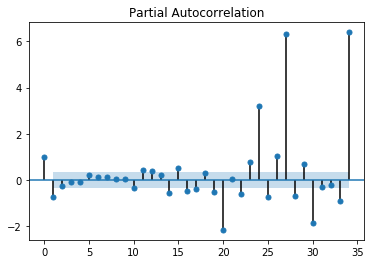

In [16]:
plot_acf(ts_diff)
plot_pacf(ts_diff)
X = ts.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

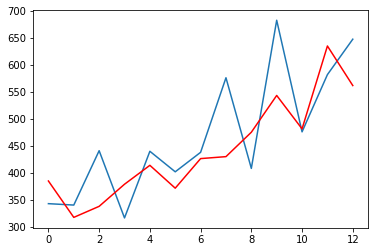

In [17]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()